# Финальный проект: вариант 2

#### Установим необходимые библиотеки, для этого выполним
```
pip install -r requirements.txt
```

Импортируем необходимые библиотеки:

In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from scipy.stats import norm 
import seaborn as sns
import matplotlib.pyplot as plt
import re

Загрузим данные из файлов:

In [3]:
def read_csv(file_name, sep):
    return pd.read_csv(file_name, sep=sep)

# Читаем файлы
groups = read_csv('Проект_2_groups.csv', ';')
groups_add = read_csv('Проект_2_group_add.csv', ',')
active_studs = read_csv('Проект_2_active_studs.csv', ',')
checks = read_csv('Проект_2_checks.csv', ';')


Посмотрим на данные:

In [15]:
print(groups.head())
print('*' * 50)
print(groups.info())
print('*' * 50)
print(f'Уникальных ID в groups: {groups.id.nunique()}')

     id grp
0  1489   B
1  1627   A
2  1768   B
3  1783   B
4  1794   A
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
**************************************************
Уникальных ID в groups: 74484


In [16]:
print(groups_add.head())
print('*' * 50)
print(groups_add.info())
print('*' * 50)
print(f'Уникальных ID в groups_add: {groups_add.id.nunique()}')

        id grp
0  5694584   B
1  5694830   B
2  5695057   B
3  5698872   B
4  5699067   B
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None
**************************************************
Уникальных ID в groups_add: 92


In [18]:
print(active_studs.head())
print('*' * 50)
print(active_studs.info())
print('*' * 50)
print(f'Уникальных ID в active_studs: {active_studs.student_id.nunique()}')

   student_id
0      581585
1     5723133
2     3276743
3     4238589
4     4475369
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
None
**************************************************
Уникальных ID в active_studs: 8341


In [19]:
print(checks.head())
print('*' * 50)
print(checks.info())
print('*' * 50)
print(f'Уникальных ID в checks: {checks.student_id.nunique()}')

   student_id    rev
0        1627  990.0
1        3185  690.0
2       25973  690.0
3       26280  690.0
4      100300  990.0
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None
**************************************************
Уникальных ID в checks: 541


----------------
Проверим, учтены ли данные из `groups_add` в `active_studs` и `checks`:

In [70]:
print(
    f'Количество учтенных ID в active_studs: {groups_add.query("id in @active_studs.student_id").shape[0]}\n'
    f'Количество учтенных ID в checks: {groups_add.query("id in @checks.student_id").shape[0]}'
)

Количество учтенных ID в active_studs: 13
Количество учтенных ID в checks: 1


Соединим `groups` c `groups_add`, так как второй является дополнением первого:

In [77]:
groups_total = pd.concat([groups, groups_add])

print(
    f'Количество строк было: {groups_add.id.count() + groups.id.count()}\n'
    f'Количество строк стало: {pd.concat([groups, groups_add]).id.count()}\n'
    f'Все верно' if groups_add.id.count() + groups.id.count() == groups_total.id.count() else 'Неверное количество'
)

Количество строк было: 74576
Количество строк стало: 74576
Все верно


In [78]:
group_total_value_cnt = groups_total.grp.value_counts()
group_total_value_cnt_0 = group_total_value_cnt.iloc[0]
group_total_value_cnt_1 = group_total_value_cnt.iloc[1]

print(
    f'Распределение всех пользователей по группам:\n'
    f'Группа A: {group_total_value_cnt_1}\n'
    f'Группа B: {group_total_value_cnt_0}\n'
    f'Всего: {group_total_value_cnt_0 + group_total_value_cnt_1}'
)

Распределение всех пользователей по группам:
Группа A: 14693
Группа B: 59883
Всего: 74576


In [80]:
paid_not_active = checks.query('student_id not in @active_studs.student_id')
print(
    f'Количество пользователей из списка активных, но не вошедших в общий список: '
    f'{active_studs.query("student_id not in @groups_total.id").shape[0]}\n'
    f'Количество оплативших пользователей, отсутствующих в общем списке: '
    f'{checks.query("student_id not in @groups_total.id").shape[0]}\n'
    f'Количество оплативших пользователей, отсутствующих в списке активных в дни проведения теста:'
    f'{paid_not_active.shape[0]}',
)

Количество пользователей из списка активных, но не вошедших в общий список: 0
Количество оплативших пользователей, отсутствующих в общем списке: 0
Количество оплативших пользователей, отсутствующих в списке активных в дни проведения теста:149


-------------
Получается, что в период проведения экспериментов были оплаты и от тех студентов, которые не посещали платформу.
Возможно, это автоматические оплаты.

In [81]:
groups_total_checks_cnt = groups_total.query("id in @checks.student_id").grp.value_counts()
groups_total_checks_cnt_0 = groups_total_checks_cnt.iloc[0]
groups_total_checks_cnt_1 = groups_total_checks_cnt.iloc[1]

print(
    f'Распредление checks по группам:\n'
    f'Группа A: {groups_total_checks_cnt_0}\n'
    f'Группа B: {groups_total_checks_cnt_1}\n'
    f'Всего: {groups_total_checks_cnt_0 + groups_total_checks_cnt_1}',
)

Распредление checks по группам:
Группа A: 434
Группа B: 107
Всего: 541


In [91]:
groups_total_not_active_cnt = groups_total.query("id in @paid_not_active.student_id").grp.value_counts()
groups_total_not_active_cnt_1 = groups_total_not_active_cnt.iloc[1]
groups_total_not_active_cnt_0 = groups_total_not_active_cnt.iloc[0]

print(
    f'Оплатили, но не в списке активных, количество по группам:\n'
    f'Группа A: {groups_total_not_active_cnt_1}\n'
    f'Группа B: {groups_total_not_active_cnt_0}\n'
    f'Всего: {groups_total_not_active_cnt_1 + groups_total_not_active_cnt_0}'
)

Оплатили, но не в списке активных, количество по группам:
Группа A: 29
Группа B: 120
Всего: 149


In [92]:
active_studs_query_cnt = groups_total.query('id in @active_studs.student_id').grp.value_counts()
active_studs_query_cnt_0 = active_studs_query_cnt.iloc[0]
active_studs_query_cnt_1 = active_studs_query_cnt.iloc[1]

print(
    f'Распределение active_studs по группам:\n'
    f'Группа A: {active_studs_query_cnt_1}\n'
    f'Группа B: {active_studs_query_cnt_0}\n'
    f'Всего: {active_studs_query_cnt_0 + active_studs_query_cnt_1}'
)

Распределение active_studs по группам:
Группа A: 1538
Группа B: 6803
Всего: 8341


In [93]:
groups_total_active_studs_in_cnt = groups_total.query('id in @active_studs.student_id & id in @checks.student_id').grp.value_counts()
groups_total_active_studs_cnt_0 = groups_total_active_studs_in_cnt.iloc[0]
groups_total_active_studs_cnt_1 = groups_total_active_studs_in_cnt.iloc[1]
print(
    f'Активные оплатившие пользователи, количество по группам:\n'
    f'Группа A: {groups_total_active_studs_cnt_1}\n'
    f'Группа B: {groups_total_active_studs_cnt_0}\n'
    f'Всего: {groups_total_active_studs_cnt_0 + groups_total_active_studs_cnt_1}'
)

Активные оплатившие пользователи, количество по группам:
Группа A: 78
Группа B: 314
Всего: 392


In [94]:
groups_total_active_studs_not_in_cnt = groups_total.query('id in @active_studs.student_id & id not in @checks.student_id').grp.value_counts()
groups_total_active_studs_not_in_cnt_0 = groups_total_active_studs_not_in_cnt.iloc[0]
groups_total_active_studs_not_in_cnt_1 = groups_total_active_studs_not_in_cnt.iloc[1]

print(
    f'Активные, но не оплатившие пользователи, количество по группам:\n'
    f'Группа A: {groups_total_active_studs_not_in_cnt_1}\n'
    f'Группа B: {groups_total_active_studs_not_in_cnt_0}\n'
    f'Всего: {groups_total_active_studs_not_in_cnt_0 + groups_total_active_studs_not_in_cnt_1}',
)

Активные, но не оплатившие пользователи, количество по группам:
Группа A: 1460
Группа B: 6489
Всего: 7949


Небольшой итог в виде диаграммы Эйлера-Венна:

![](images/oval_diagram.png)

Итого: есть активные пользователи, те, что заходили на сайт в дни проведения теста и есть пользователи, которые совершили платежи. Активные с оплатившими пересекаются только частично, отсюда возникает вопрос: кто те пользователи, которые оплатили, но не попали в список активных? Из постановки задачи это не ясно, возможно это автоматические платежи, а возможно сбой системы и все оплатившие являются активными. Так как у нас нет возможности прояснить это, уберём из выборки оплативших не активных, то есть оплативших будем брать только тех, кто одновременно является и оплатившим, и активным (пересечение `active_studs` и `checks` - 392 человека).

Пользователи распределены по группам неравномерно. Группа B значительно больше, чем группа А.

----------------------------------

Объединим список активных пользователей со списком оплативших, отбросив из последних тех, кого нет в списке активных:

In [96]:
active_checks = (
    active_studs.merge(
        checks,
        how='left',
        on='student_id',
    ).rename(
        columns={'student_id': 'id'},
    )
)
active_checks.query('rev.notna()').head()

,id,rev
62,1184303,1530.0000
67,3354191,1900.0001
77,3278734,1900.0000
99,720651,1980.0000
193,1232221,1900.0000


Объединим активных оплативших из предыдущего шага с `groups_total`, оставив только активных:

In [97]:
active_total = groups_total.merge(active_checks, how='right', on='id')

Добавим колонку со статусом оплаты (0 - не оплачен, 1 - оплачен):

In [98]:
active_total['payment'] = active_total.rev.apply(lambda x: 0 if np.isnan(x) else 1)
active_total.query('rev.isna()').head()

,id,grp,rev,payment
0,581585,A,NaN,0
1,5723133,A,NaN,0
2,3276743,B,NaN,0
3,4238589,A,NaN,0
4,4475369,B,NaN,0


Заменим NaN на нули:

In [99]:
active_total['rev'] = active_total.rev.fillna(0)

Сформируем датафрейм со всей собранной информацией.
Активные + оплатившие:

In [100]:
active_total_paid = active_total.query('rev > 0')
active_total_paid.head()

,id,grp,rev,payment
62,1184303,A,1530.0000,1
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
99,720651,A,1980.0000,1
193,1232221,B,1900.0000,1


Активные пользователи, группа А:

In [105]:
a_group = active_total.query('grp == "A"')
a_group.head()

,id,grp,rev,payment
0,581585,A,0.0,0
1,5723133,A,0.0,0
3,4238589,A,0.0,0
7,1394612,A,0.0,0
21,5194768,A,0.0,0


Активные оплатившие пользователи, группа А:

In [106]:
a_group_paid = a_group.query('rev > 0')
a_group_paid.head()

,id,grp,rev,payment
62,1184303,A,1530.0,1
99,720651,A,1980.0,1
306,4337103,A,580.0,1
392,332387,A,2910.0,1
439,1659434,A,690.0,1


Активные пользователи, группа B:

In [107]:
b_group = active_total.query('grp == "B"')
b_group.head()

,id,grp,rev,payment
2,3276743,B,0.0,0
4,4475369,B,0.0,0
5,5481015,B,0.0,0
6,1353433,B,0.0,0
8,1170611,B,0.0,0


Активные оплатившие пользователи, группа B:

In [108]:
b_group_paid = b_group.query('rev > 0')
b_group_paid.head()

,id,grp,rev,payment
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
193,1232221,B,1900.0000,1
195,3821501,B,1900.0000,1
211,1036096,B,1900.0000,1


--------------
Распределение группы А (все пользователи):

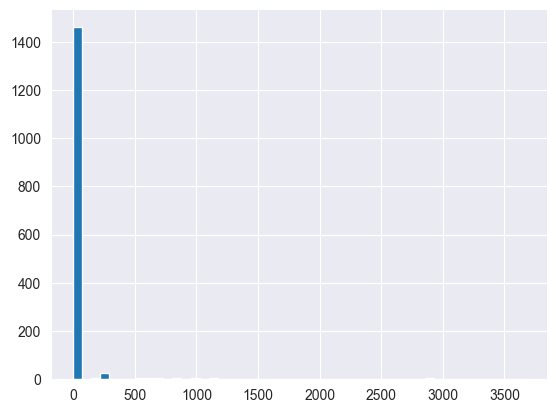

In [109]:
a_group.rev.hist(bins=50)
sns.despine()

Распределение группы В (все пользователи):

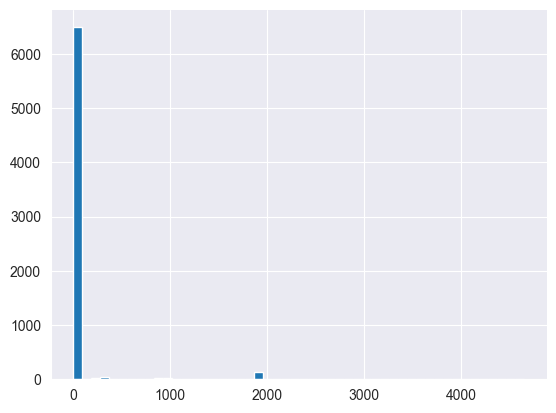

In [110]:
b_group.rev.hist(bins=50)
sns.despine()

Распределение группы А (только купившие):

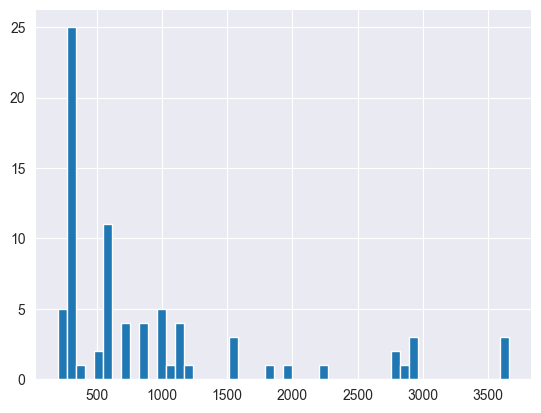

In [111]:
a_group_paid.rev.hist(bins=50)
sns.despine()

Распределение группы В (только купившие):

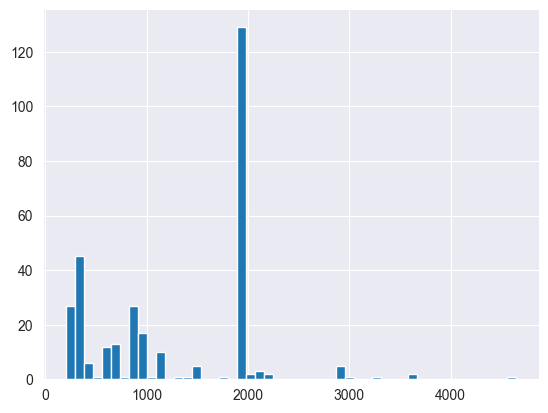

In [112]:
b_group_paid.rev.hist(bins=50)
sns.despine()

Сравним описательную статистику по всем пользователям в двух группах:

In [113]:
a_group_descr = a_group.rev.describe().to_frame().rename(columns={'rev': 'Группа В'})
b_group_descr = b_group.rev.describe().to_frame().rename(columns={'rev': 'Группа А'})
pd.concat([a_group_descr, b_group_descr], axis=1)

,Группа В,Группа А
count,1538.000000,6803.000000
mean,47.347204,58.058798
std,290.490632,313.770201
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,3660.000000,4650.000000


Сравним описательную статистику по оплатившим пользователям в двух группах:

In [114]:
a_group_descr = a_group_paid.rev.describe().to_frame().rename(columns={'rev': 'Группа А'})
b_group_descr = b_group_paid.rev.describe().to_frame().rename(columns={'rev': 'Группа В'})
pd.concat([a_group_descr, b_group_descr], axis=1)

,Группа А,Группа В
count,78.000000,314.000000
mean,933.589744,1257.878992
std,919.932711,790.864254
min,199.000000,199.000000
25%,290.000000,511.750000
50%,585.000000,1140.000000
75%,1114.750000,1900.000000
max,3660.000000,4650.000000


Посмотрим на выборосы (все пользователи):

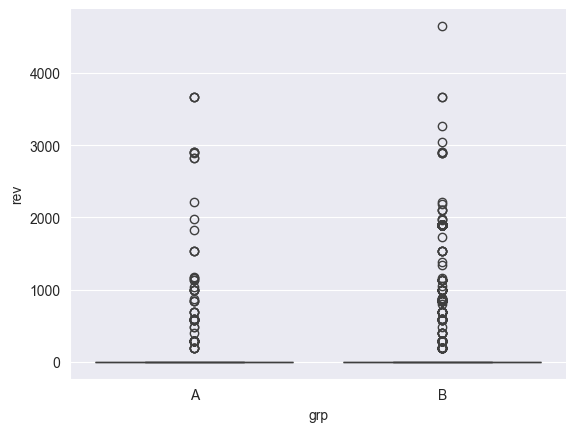

In [115]:
sns.boxplot(data=active_total, y='rev', x='grp')
sns.despine()

Посмотрим на выборосы (купившие):

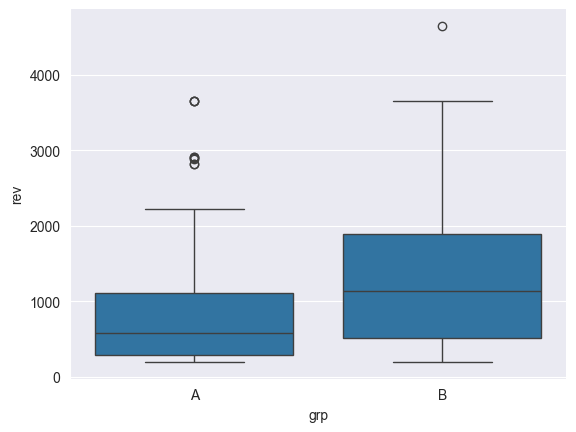

In [116]:
sns.boxplot(data=active_total_paid, y='rev', x='grp')
sns.despine()

Выбранные метрики:
* `CR` (конверсия онлайн платежей) - отношение количества оплативших клиентов к общему числу активных клиентов.
Может отражать юзабилити новой механики оплаты. Например - часть пользователей не оплачивают так как сталкиваются с трудностями при оплате. Следовательно, CR выше в том варианте, где пользователю проще произвести оплату.
* `ARPU` - отношение общей суммы на количество активных пользователей.
Важный показатель для бизнеса, при увеличении этого показателя бизнес получает больше денег.
* `ARPPU` - отношение общей суммы на количество активных оплативших пользователей.
Причины выбора этой метрики такие же, как и в случае с ARPU.


In [123]:
a_group_cr_ = round(a_group_paid.id.count() / a_group.id.count(), 4)
b_group_cr_ = round(b_group_paid.id.count() / b_group.id.count(), 4)
cr_ = round((b_group_cr_ - a_group_cr_) / a_group_cr_, 3) * 100
print(
    f'CR\nКонверсия оплативших пользователей:\n'
    f'Группа А: {a_group_cr_}\n'
    f'Группа В: {b_group_cr_}\n'
    f'Конверсия у группы B на {abs(cr_)}% {"больше" if cr_ > 0 else "меньше"}, чем у группы А\n'
)

a_group_mean_ = a_group_paid.rev.mean()
b_group_mean_ = b_group_paid.rev.mean()
a_group_mean_round =round(a_group_mean_, 2)
b_group_mean_round = round(b_group_mean_, 2)
percents =  round(round(b_group_mean_ - a_group_mean_, 2) / a_group_mean_round * 100, 2)

print(
    f'ARPPU\nОтношение общей суммы на количество активных оплативших пользователей:\n'
    f'Группа А: {a_group_mean_round}\n'
    f'Группа В: {b_group_mean_round}\n'
    f'ARPPU группы В на {percents}% '
    f'{"больше" if percents > 0 else "меньше"}, чем у группы А\n'
)

a_group_sum_ = a_group_paid.rev.sum()
b_group_sum_ = b_group_paid.rev.sum()
a_group_sum_round = round(a_group_paid.rev.sum() / a_group.id.count(), 2)
b_group_sum_round = round(b_group_paid.rev.sum() / b_group.id.count(), 2)
percents_sum = round((b_group_sum_round - a_group_sum_round) / round(a_group_paid.rev.sum() / a_group.id.count(), 2) * 100, 2)

print(
    'ARPU\nОтношение общей суммы на количество активных пользователей:\n'
    f'Группа А: {a_group_sum_round}\n'
    f'Группа В: {b_group_sum_round}\n'
    f'ARPU группы В на {percents_sum}% {"больше" if percents_sum > 0 else "меньше"}, чем у группы А'
)

CR
Конверсия оплативших пользователей:
Группа А: 0.0507
Группа В: 0.0462
Конверсия у группы B на 8.9% меньше, чем у группы А

ARPPU
Отношение общей суммы на количество активных оплативших пользователей:
Группа А: 933.59
Группа В: 1257.88
ARPPU группы В на 34.74% больше, чем у группы А

ARPU
Отношение общей суммы на количество активных пользователей:
Группа А: 47.35
Группа В: 58.06
ARPU группы В на 22.62% больше, чем у группы А


### Имеются ли различия в показателях и с чем они могут быть связаны?
Наблюдаем отрицательный эффект `CR`, и положительные эффекты в `ARPU` и `ARPPU`. Другими словами: конверсия падает, но доход на пользователя/покупателя растёт. Это может быть связано с отсечением части пользователей, платящих малые суммы с одновременным увеличением среднего чека.

### Являются ли эти различия статистически значимыми?
Размеры групп очень сильно отличаются, поэтому классические тесты могут давать большие погрешности. В таких случаях идеально подходит `bootstrap`.

* Строим `bootstrap` распределения для групп А и B.
* Вычислим их разницу.
* В получившемся распределении разницы находим доверительный интервал.
* Проверяем, попадает ли доверительный интервал в 0. Если да, то нулевая гипотеза на данном уровне значимости принимается, если нет - отвергается.
------

Напишем функцию, которая позволит проверять гипотезы с помощью bootstrap:

In [125]:
# функция для проверки гипотез с помощью бутстрапа
def get_bootstrap(
    data_column_1,                       # числовые значения первой (контрольной) выборки
    data_column_2,                       # числовые значения второй (тестовой) выборки
    boot_it   = 1000,                    # количество бутстрэп-подвыборок
    statistic = np.mean,                 # интересующая нас статистика
    bootstrap_conf_level = 0.95,         # уровень значимости
    graph         = True,                # рисовать график
    show_progress = True                 # показать индикатор прогресса
    ):
    boot_len  = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    
    # индикатор прогресса
    if show_progress:
        progress_bar = tqdm
    else:
        progress_bar = lambda x: x
    
    for _ in progress_bar(range(boot_it)):        # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True                        # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_delta = samples_2 - samples_1      # находим разницу подвыборок
        boot_data.append(statistic(samples_delta)) # применяем статистику для разниц подвыборок
        
    pd_boot_data = pd.DataFrame(boot_data)

    # доверительный интервал 
    left_quant  = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0,
        loc=np.mean(boot_data),
        scale=np.std(boot_data),
    )
    p_2 = norm.cdf(
        x=0,
        loc=-np.mean(boot_data),
        scale=np.std(boot_data),
    )
    p_value = min(p_1, p_2) * 2
        
    # Графики
    if graph:
        plt.hist(pd_boot_data[0], bins = 50)
        plt.style.use('ggplot')
        plt.vlines(ci, ymin=0, ymax=50, linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()
       
    return {"ci": ci, 
            "p_value": p_value}

Определим функции для метрик:

In [126]:
def cr_func(x):
    """
    CR
    Для корректной работы функции в качестве аргумента x
    необходимо передать серию со значениями 1 и 0, или True и False,
    в соответствие с тем, что произошло ожидаемое событие или нет.
    """
    return sum(x) / len(x)

def arpu_func(y):
    """
    ARPU
    Для корректной работы функции в качестве аргумента y
    необходимо передать серию, где все NaN-значения заменены на 0
    """
    return np.mean(y)

def arppu_func(y):
    """
    ARPPU
    Для корректной работы функции в качестве аргумента y
    необходимо передать серию, где отобраны только платежи, то есть отфильтрованы нули
    или вместо нулей стоят NaN.
    """
    return np.mean(y)

### CR

Сформулируем нулевую и альтернативную гипотезы:

* `H0`: CR в двух группах одинаковые.
* `H1`: CR в двух группах различаются.

100%|██████████| 1000/1000 [00:00<00:00, 2253.18it/s]


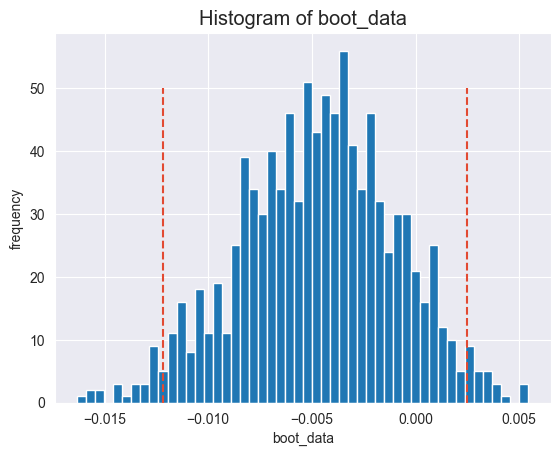

{'ci':               0
 0.025 -0.012204
 0.975  0.002499,
 'p_value': np.float64(0.2064346109090206)}

In [127]:
get_bootstrap(a_group.payment, b_group.payment, statistic=cr_func)

Доверительный интервал **попадает в 0**, недостаточно оснований отвергнуть нулевую гипотезу. Нельзя утверждать, что различия CR в двух группах есть.

### ARPU
Сформулируем нулевую и альтернативную гипотезы:

* `H0`: ARPU в двух группах одинаковые.
* `H1`: ARPU в двух группах различаются.

100%|██████████| 1000/1000 [00:00<00:00, 5260.22it/s]


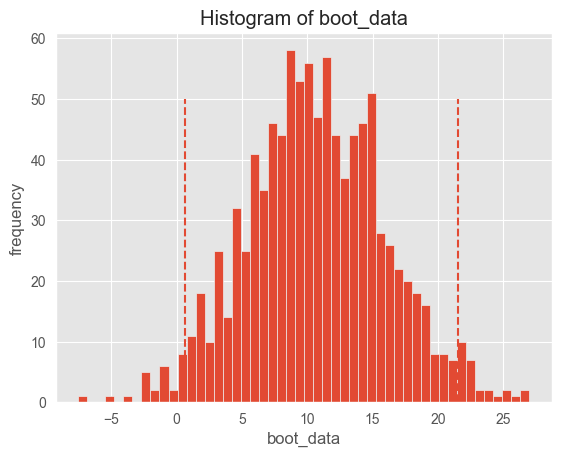

{'ci':                0
 0.025   0.619926
 0.975  21.546017,
 'p_value': np.float64(0.04265546417270172)}

In [128]:
get_bootstrap(a_group.rev, b_group.rev, statistic=arpu_func)

Доверительный интервал **не попадает в 0**, отвергаем нулевую гипотезу. ARPU в двух группах различаются.

### ARPPU
Сформулируем нулевую и альтернативную гипотезы:

* `H0`: ARPPU в двух группах одинаковые.
* `H1`: ARPPU в двух группах различаются.

100%|██████████| 1000/1000 [00:00<00:00, 15716.60it/s]


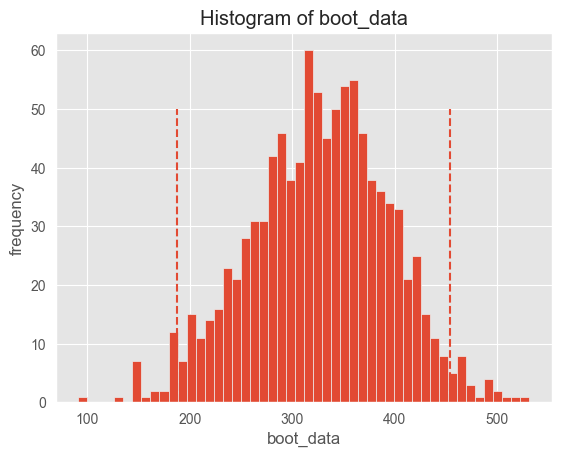

{'ci':                 0
 0.025  187.250891
 0.975  453.992287,
 'p_value': np.float64(1.3759437854553301e-06)}

In [130]:
get_bootstrap(a_group.rev[a_group.rev > 0], b_group.rev[b_group.rev > 0], statistic=arppu_func)

Доверительный интервал **не попадает в 0**, отвергаем нулевую гипотезу. ARPPU в двух группах различаются.

### Стоит ли запускать новую механику на всех пользователей?
Да, новая механика оплаты даёт статистически значимый прирост в метриках ARPU и ARPPU, отрицательное изменение метрики CR не подтвердилось.

# Задание 2. SQL

## 2.1 Очень усердные ученики

Сопоставим все термины для понимания:

* карточки = задания = горошины,
* студент = ученик,
* усердный - 20 горошин (карточек / заданий) в месяц,
* очень усердный - 20 горошин (карточек / заданий) в час.

Ищем количетсво очень усердных студентов за ноябрь 2024, то есть тех, кто в течение ноября 2024 года смог выполнить хотя бы один раз 20 горошин в течение часа.

```sql
SELECT 
    COUNT(DISTINCT sq.st_id) AS hardworking_students          -- считаем количество отобранных уникальных студентов 
FROM (                                                        -- подзапрос
    SELECT  
        st_id, 
        timest,
        SUM(correct) OVER W AS peas_per_hour                  -- считаем кличество правильно решённых горошин в окне (в час)
    FROM peas
    WHERE 
        extract(Month from timest) = 11                        -- месяц = 11 (ноябрь)
        AND 
        extract(Year from timest) = 2024                      -- год = 2024
    WINDOW W AS (
            PARTITION BY st_id                                -- группируем по id студента
            ORDER BY timest                                   -- сортируем по времени
            RANGE BETWEEN '1 hour' PRECEDING AND CURRENT ROW) -- выбираем окно с 1 часа назад до текущей строки
    ) AS sq
WHERE sq.peas_per_hour >= 20                                  -- отбираем только тех где количество горошин в час >= 20
```

## 2.2 Оптимизация воронки
Активным будем считать тех, кто хотя бы раз выполнил 30 заданий в день. Т.е. те, кто столкнулся с лимитом выполнения задач.

* **ARPU** (Average Revenue Per User ) - отношение выручки к общему количеству пользователей.
* **ARPAU** (Average Revenue Per Active User) - отношение выручки к количеству активных пользователей.
* **CR в покупку** - отношение количества купивших пользователей к общему количеству пользователей.
* **СR активного пользователя в покупку** - отношение количества купивших активных пользователей к общему количеству активных пользователей.
* **CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике** - отношение количества купивших активных в математике пользователей к общему количеству активных в математике пользователей.

### План
1. Из таблицы `peas` получим список уникальных пользователей с отметками "0" или "1" об активности в целом.
2. Из таблицы `peas` получим список уникальных пользователей с отметками "0" или "1" об активности в математике.
3. Из таблицы `studs` получим данные о принадлежности пользователя к группе (test/control).
4. Из таблицы `checks` получим список оплативших пользователей со значениями "0" и "1" для купивших любой предмет и купивших математику.
5. Джойним 4 подзапроса.
6. Агрегируем полученные поля для подсчёта нужных метрик.

------------

### 1. Из таблицы `peas` получим список уникальных пользователей с отметками "0" или "1" об активности в целом.
```sql
(-- АКТИВНЫЕ ПОЛЬЗОВАТЕЛИ
SELECT actives.st_id, 
    MAX(CASE WHEN actives.peas_per_day >= 30 THEN 1 ELSE 0 END) AS active_in_total
FROM 
    (
    SELECT                                            -- считаем количество горошин в день 
        st_id, 
        timest, 
        SUM(correct) OVER W AS peas_per_day, 
        subject
    FROM peas 
    WINDOW W AS (
            PARTITION BY st_id                        -- группировка по студентам
            ORDER BY timest
            RANGE BETWEEN '1 day' PRECEDING AND CURRENT ROW
            ) 
    ) AS actives
GROUP BY st_id
) AS at
```

* В разделе `SELECT` используется конструкция `CASE WHEN actives.peas_per_day >= 30 THEN 1 ELSE 0 END` - это аналог `IF`, который позволяет в `SELECTe` заменять null-значения на 0.
* В подзапросе этого подзапроса в строке `SUM(correct) OVER W AS peas_per_day` мы с помощью окна `W` находим сумму правильно решёных задач. Т.к. поле `correct` содержит значения 0 для нерешённых и 1 для решённых, то такой запрос позволяет нам найти количество решённых задач в день.
* Параметры окна указываются после ключевого слова `WINDOW`. `PARTITION BY st_id` - группировать по студентам, `ORDER BY timest` - этот параметр одновременно и сортирует и указывает по какому полю будем брать окно, в данном случае - это время выполнения задачи.

### 2. Из таблицы `peas` получим список уникальных пользователей с отметками "0" или "1" об активности в математике.
```sql
(-- АКТИВНЫЕ ПОЛЬЗОВАТЕЛИ по математике
SELECT active_by_subj.st_id, 
    MAX(CASE WHEN active_by_subj.math_per_day >= 30 THEN 1 ELSE 0 END) AS active_in_math
FROM 
    (
    SELECT     -- считаем количество горошин в день по предметам
        st_id, 
        timest, 
        SUM(correct) OVER W2 AS math_per_day, 
        subject
    FROM peas 
    WINDOW W2 AS (
            PARTITION BY st_id, subject                       -- группировка по студентам  и предметам
            ORDER BY timest
            RANGE BETWEEN '1 day' PRECEDING AND CURRENT ROW
            ) 
    ) AS active_by_subj
```
Данный подзапрос аналогичен предыдущему.

### 3. Из таблицы `studs` получим данные о принадлежности пользователя к группе (test/control).
Здесь мы просто джойним таблицу `studs` без дополнительных преобразований.
```sql
JOIN 
    -- ОТМЕТКИ test / control
    studs     
ON at.st_id = studs.st_id
```

### 4. Из таблицы `checks` получим список оплативших пользователей со значениями "0" и "1" для купивших любой предмет и купивших математику.

```sql
--ПОКУПКА ЛЮБОГО ПРЕДМЕТА, ПОКУПКА МАТЕМАТИКИ
(
SELECT st_id, SUM(money) AS money,
    1 AS sale_subject,
    MAX(CASE WHEN subject = 'math' THEN 1 ELSE 0 END) AS sale_math
FROM checks 
GROUP BY st_id
) AS s
```

В этом подзапросе формируем две колонки, одна из которых `sale_subject` будет заполнена единицами, что говорит о совершении покупки пользователем (все единицы, т.к. это список купишвих пользователей, здесь нет других). Во второй `sale_math` - назначаем 1 пользователю купившему математику и 0 не купившему.

### 5. Джойним 4 подзапроса.
### 6. Агрегируем полученные поля для подсчёта нужных метрик.

#### Результирующий запрос
```sql
SELECT 
    studs.test_grp, 
    COALESCE(SUM(s.money), 0) / COUNT(at.st_id) AS ARPU,
    COALESCE(SUM(s.money), 0) / SUM(at.active_in_total) AS ARPAU,
    COALESCE(SUM(s.sale_subject), 0)::float / COUNT(at.st_id) AS CR,
    SUM(CASE WHEN at.active_in_total = 1 AND s.sale_subject = 1 THEN 1 ELSE 0 END)::float / SUM(at.active_in_total) AS СR_active,
    SUM(CASE WHEN am.active_in_math = 1 AND s.sale_math = 1 THEN 1 ELSE 0 END)::float / SUM(am.active_in_math) AS CR_math
FROM
    (-- АКТИВНЫЕ ПОЛЬЗОВАТЕЛИ
    SELECT actives.st_id, 
        MAX(CASE WHEN actives.peas_per_day >= 30 THEN 1 ELSE 0 END) AS active_in_total
    FROM 
        (
        SELECT     -- считаем количество горошин в день 
            st_id, 
            timest, 
            SUM(correct) OVER W AS peas_per_day, 
            subject
        FROM peas 
        WINDOW W AS (
                PARTITION BY st_id                        -- группировка по студентам
                ORDER BY timest
                RANGE BETWEEN '1 day' PRECEDING AND CURRENT ROW
                ) 
        ) AS actives
    GROUP BY st_id
    ) AS at
INNER JOIN
    (-- АКТИВНЫЕ ПОЛЬЗОВАТЕЛИ по математике
    SELECT active_by_subj.st_id, 
        MAX(CASE WHEN active_by_subj.math_per_day >= 30 THEN 1 ELSE 0 END) AS active_in_math
    FROM 
        (
        SELECT     -- считаем количество горошин в день по предметам
            st_id, 
            timest, 
            SUM(correct) OVER W2 AS math_per_day, 
            subject
        FROM peas 
        WINDOW W2 AS (
                PARTITION BY st_id, subject                       -- группировка по студентам  и предметам
                ORDER BY timest
                RANGE BETWEEN '1 day' PRECEDING AND CURRENT ROW
                ) 
        ) AS active_by_subj
    GROUP BY st_id
    ) AS am
ON at.st_id = am.st_id
INNER JOIN 
    -- отметки test / control
    studs     
ON at.st_id = studs.st_id
LEFT JOIN
    --покупка любого предмета, покупка математики
    (
    SELECT st_id, SUM(money) AS money,
        1 AS sale_subject,
        MAX(CASE WHEN subject = 'math' THEN 1 ELSE 0 END) AS sale_math
    FROM checks 
    GROUP BY st_id
    ) AS s
ON at.st_id = s.st_id
GROUP BY test_grp
```

#### Пояснения по блоку SELECT

```sql
1. studs.test_grp -- колонка со значением групп: test и control.
```
```sql
2. COALESCE(SUM(s.money), 0) / COUNT(at.st_id) AS ARPU -- функция COALESCE() позволяет в данном случае заменить null на 0 и корректно посчитать сумму.
```
```sql
3. COALESCE(SUM(s.money), 0) / SUM(at.active_in_total) AS ARPAU -- точно также, как и в предыдущем случае функция COALESCE() заменяет null на 0.
```
```sql
4. COALESCE(SUM(s.sale_subject), 0)::float / COUNT(at.st_id) AS CR -- точно также COALESCE() заменяет null на 0 и, т.к. и в числителе и в знаменателе целые числа, то и результат получается тоже целочисленным (в данном случае 0), чтобы исправить это переводим числитель во float (::float).
```
```sql
5. SUM(CASE WHEN at.active_in_total = 1 AND s.sale_subject = 1 THEN 1 ELSE 0 END)::float / SUM(at.active_in_total) AS СR_active -- здесь для отбора активных дополнительно используем конструкцию CASE END - это аналог IF. Для подсчёта СR_active отбираем только активных.
```
```sql
6. SUM(CASE WHEN am.active_in_math = 1 AND s.sale_math = 1 THEN 1 ELSE 0 END)::float / SUM(am.active_in_math) AS CR_math -- аналогичным образом отбираем только активных в математике.
```

# Задание 3. Python

Предположим, что у нас уже есть рабочий датафрейм:

In [131]:
# рабочий датафрэйм
total_test = (
    groups.merge(
        active_studs.assign(
            activity=1,
        ).rename(
            columns={'student_id': 'id'},
        ), on='id', how='outer',
        ).merge(
        checks.assign(
            payment=1,
        ).rename(
            columns={'student_id': 'id'},
        ), on='id', how='outer',
    ).assign(
        step=0,
    )
)
total_test.head()

,id,grp,activity,rev,payment,step
0,1489,B,NaN,NaN,NaN,0
1,1627,A,1.0,990.0,1.0,0
2,1768,B,NaN,NaN,NaN,0
3,1783,B,NaN,NaN,NaN,0
4,1794,A,NaN,NaN,NaN,0


У нас имеется ссылка на дополнительный файл:

In [152]:
# дополнительный файл
file_path = '' # путь должен заканчиваться на /, оставить пустым если файл находится в одной папке со скриптом
file_name = 'group_add.csv' # название файла
file_name_w_path = f'{file_path}{file_name}'

Напишем несколько вспомогательных функций:

In [153]:
# выделяем активных, заполняем пропуски нулями
def get_active(df, to_dropnan_ls: list=None, to_fillnan_ls: list=None):
    """
    df - dataframe
    to_dropnan_ls - указываем список колонок dataframe, по которым удаляем строки с NaN
    to_fillnan_ls - указываем список колонок dataframe, по которым NaN заполняем нулями
    """
    if not to_dropnan_ls:
        to_dropnan_ls=['activity', 'grp']
    if not to_fillnan_ls:
        to_fillnan_ls=['payment', 'rev']

    df = (df.copy().dropna(subset=to_dropnan_ls))

    for i in to_fillnan_ls:
        df[i] = df[i].fillna(0)
    return df


# определяем разделитель в csv-файле
def get_sep(file_path_w_name: str):
    with open(file_path_w_name, 'r') as file:
        temp = file.readline()
    pattern = re.compile(r'\w*([,;])\w*')
    return pattern.findall(temp)[0]


# переименовываем колонки в соответствие с типом данных
def columns_renamer(df):
    if str(df.iloc[0, 0]).isalpha():
        df.columns = ['grp', 'id']
    else:
        df.columns = ['id', 'grp']

Далее, напишем функцию, которая будет автоматически подгружать информацию из дополнительного файла `groups_add.csv` и пересчитывать метрики:

In [154]:
def get_update(work_df, new_file, final=False):
    """
    Функция обновления данных и пересчёта метрик.
    На выходе поучаем dataframe со значениями метрик и p-value,
    каждая строка - новый шаг добавления данных (номер обновления показан в колонке step, шаг 0 - значения без доп. файла/обновления)
    :param work_df: объединённый dataframe из groups.csv, active_studs.csv, checks.csv (получены в первый раз)
    :param new_file: дополнительный файл groups_add.csv
    :param final: default = False, если True, выведет только последнюю (финальную) строку таблицы
    """

    # Читаем файл
    group_add_df = pd.read_csv(new_file, sep=get_sep(new_file))

    # переименуем колонки в соответствии с типом данных
    columns_renamer(group_add_df)

    work_df = work_df.merge(group_add_df, on='id', how='outer') # объединяем основной дф с дополнительным
    work_df['grp_x'] = work_df.grp_x.fillna('') # заполняем пропуски пустым символом
    work_df['grp_y'] = work_df.grp_y.fillna('') # заполняем пропуски пустым символом
    work_df['grp'] = work_df.grp_x + work_df.grp_y # объединяем колонки групп
    work_df = work_df.drop(['grp_x', 'grp_y'], axis=1) # удаляем колонки grp_x и grp_y
    
    # присваиваем значения step в добавленных строках
    mask = work_df.id.isin(group_add_df.id) # назначаем маску, согласно которой будем присваивать новый номер степа
    work_df.loc[mask, 'step'] = work_df.step.max() + 1 # присваиваем номер степа
    work_df['step'] = work_df.step.astype('int') # переводим колонку степ в int

    # оставим только активных
    work_df = get_active(work_df)
    
    # пересчитаем метрики, каждый цикл - новое добавление файла groups_add
    df_ab = pd.DataFrame() # пустой дф для заполнения через цикл

    for i in range(work_df.step.max() + 1):  # итеритуемся по максимальному значению колонки step +1
        # фильтруем датасет для рассчёта метрик
        payment_a = work_df.query('step <= @i and grp =="A"').payment
        payment_b = work_df.query('step <= @i and grp =="B"').payment
        rev_all_a = work_df.query('step <= @i and grp =="A"').rev
        rev_all_b = work_df.query('step <= @i and grp =="B"').rev
        rev_positive_a = work_df.query('step <= @i and rev > 0 and grp =="A"').rev
        rev_positive_b = work_df.query('step <= @i and rev > 0 and grp =="B"').rev

        #CR_a
        cr_a = cr_func(payment_a)
        #CR_b
        cr_b = cr_func(payment_b)
        #CR p-value
        cr_p_value = get_bootstrap(
            payment_a,
            payment_b,
            statistic=cr_func,
            graph = False,
            show_progress = False,
        )["p_value"]
        #ARPU_a
        arpu_a = arpu_func(rev_all_a)
        #ARPU_b
        arpu_b = arpu_func(rev_all_b)
        #ARPU p-value
        arpu_p_value = get_bootstrap(
            rev_all_a,
            rev_all_b,
            statistic=arpu_func,
            graph = False,
            show_progress = False
        )["p_value"]
        #ARPPU_a
        arppu_a = arppu_func(rev_positive_a)
        #ARPPU_b
        arppu_b = arppu_func(rev_positive_b)
        #ARPPU p-value
        arppu_p_value = get_bootstrap(
            rev_positive_a,
            rev_positive_b,
            statistic=arppu_func,
            graph = False,
            show_progress = False
        )["p_value"]

        # временный датафрэйм
        temp_df = pd.DataFrame([
            [cr_a, cr_b, cr_p_value, arpu_a, arpu_b, arpu_p_value, arppu_a, arppu_b, arppu_p_value]
        ], columns=['CR_A', 'CR_B', 'CR_p-value', 'ARPU_A', 'ARPU_B', 'ARPU_p-value', 'ARPPU_A', 'ARPPU_B', 'ARPPU_p-value']
        )
        # добавляем строку в итоговый дф
        df_ab = pd.concat([df_ab, temp_df])      
    
    # сбрасываем индексы
    df_ab.reset_index(drop=True, inplace=True)  
    df_ab['step'] = df_ab.index

    if final:
        return df_ab.tail(1)
    return df_ab

В функцию `get_update` передадим предварительно сформированный dataframe `total_test`:

In [174]:
metrics = get_update(total_test, file_name_w_path)
metrics

,CR_A,CR_B,CR_p-value,ARPU_A,ARPU_B,ARPU_p-value,ARPPU_A,ARPPU_B,ARPPU_p-value,step
0,0.050814,0.046077,0.210772,47.439739,57.864567,0.038273,933.589744,1255.827487,0.000003,0
1,0.050715,0.046156,0.204432,47.347204,58.058798,0.031358,933.589744,1257.878992,0.000003,1


Напишем функцию отрисовки графиков:

In [175]:
def get_graphs(df):
    """
    Функция построения графика на основе dataframe, сформированного функцией get_update
    Шесть графиков:
    по оси X - номер обновления (колонка step в передаваемом dataframe), показывает,
    какой раз обновились данные (некий аналог временной шкалы, так как не известны даты создания
    дополнительных файлов)
    по оси Y - метрики (верхний ряд графиков) и p-value этих метрик (нижний ряд графиков)
    """
    # формируем dataframe для отрисовки метрик
    metrics_df = pd.DataFrame(columns = ['step', 'group']) # создаём пустой финальный дф для построения графиков метрик
    for i in ['CR_', 'ARPU_', 'ARPPU_']: # список части названий колонок для отбора
        cols = df.filter(like = i).columns # отбираем колонки содержащие названия метрик
        temp_df = pd.DataFrame() # создаём пустой дф
        for j in cols[:2]: # итерируемся по названиям колонок, кроме p-value
            # формируем строку нового дф
            tmp_row = df[
                [j, 'step']
            ].assign(
                group=j[-1:]
            ).rename(
                columns={j: j[:-2]}
            )
            temp_df = pd.concat([temp_df, tmp_row]) # добавляем строку в промежуточный дф
        metrics_df = metrics_df.merge(temp_df, on=['step', 'group'], how='right') # объединяем промежуточный дф с финальным
    
    # формируем блок из 6 графиков
    figure, axes = plt.subplots(2, 3, sharex=True, figsize=(16,7))   
    
    # заголовок
    figure.suptitle('Метрики и p-value', fontsize=20)
    
    # графики CR и p-value для CR
    sns.lineplot(ax=axes[0, 0], data=metrics_df, x='step', y='CR', hue='group', linewidth=2)
    ax1 = sns.lineplot(ax=axes[1, 0], data=df, x='step', y='CR_p-value', linewidth=2, color="#5fa0c6", label='p-value')
    ax1.axhline(0.05, ls='--', linewidth=1.5, color=(1, 0, 0, 0.7), label='p-value = 0.05')
    ax1.set_ylabel('P-value для CR')
    ax1.set_xlabel('Номер обновления')
    ax1.legend()
    
    # графики ARPU и p-value для ARPU
    sns.lineplot(ax=axes[0, 1], data=metrics_df, x='step', y='ARPU', hue='group', linewidth=2)
    ax2 = sns.lineplot(ax=axes[1, 1], data=df, x='step', y='ARPU_p-value', linewidth=2, color="#5fa0c6", label='p-value')
    ax2.axhline(0.05, ls='--', linewidth=1.5, color=(1, 0, 0, 0.7), label='p-value = 0.05')
    ax2.set_ylabel('P-value для ARPU')
    ax2.set_xlabel('Номер обновления')
    ax2.legend()
    
    # графики ARPPU и p-value для ARPPU
    sns.lineplot(ax=axes[0, 2], data=metrics_df, x='step', y='ARPPU', hue='group', linewidth=2)
    ax3 = sns.lineplot(ax=axes[1, 2], data=df, x='step', y='ARPPU_p-value', linewidth=2, color="#5fa0c6", label='p-value')
    ax3.axhline(0.05, ls='--', linewidth=1.5, color=(1, 0, 0, 0.7), label='p-value = 0.05')
    ax3.set_ylabel('P-value для ARPPU ')
    ax3.set_xlabel('Номер обновления')
    ax3.set_xticks(range(0, metrics_df.step.max() + 1))  # сделаем шаг по оси х = 1
    ax3.legend()
    
    # устанавливаем лимиты на ось y
    plt.gcf().get_axes()[0].set_ylim(0, metrics_df.CR.max() * 1.1)
    plt.gcf().get_axes()[1].set_ylim(0, metrics_df.ARPU.max() * 1.1)
    plt.gcf().get_axes()[2].set_ylim(0, metrics_df.ARPPU.max() * 1.1)
    plt.gcf().get_axes()[3].set_ylim(-0.001, max(0.05, metrics['CR_p-value'].max()) * 1.1)
    plt.gcf().get_axes()[4].set_ylim(-0.001, max(0.05, metrics['ARPU_p-value'].max()) * 1.1)
    plt.gcf().get_axes()[5].set_ylim(-0.001, max(0.05, metrics['ARPPU_p-value'].max()) * 1.1)
    
    # добавляем расстояния между графиками
    plt.subplots_adjust(top=0.92, hspace = 0.1, wspace=0.3)

В функцию `get_graphs` передадим метрики, записанные в переменную `metrix`:

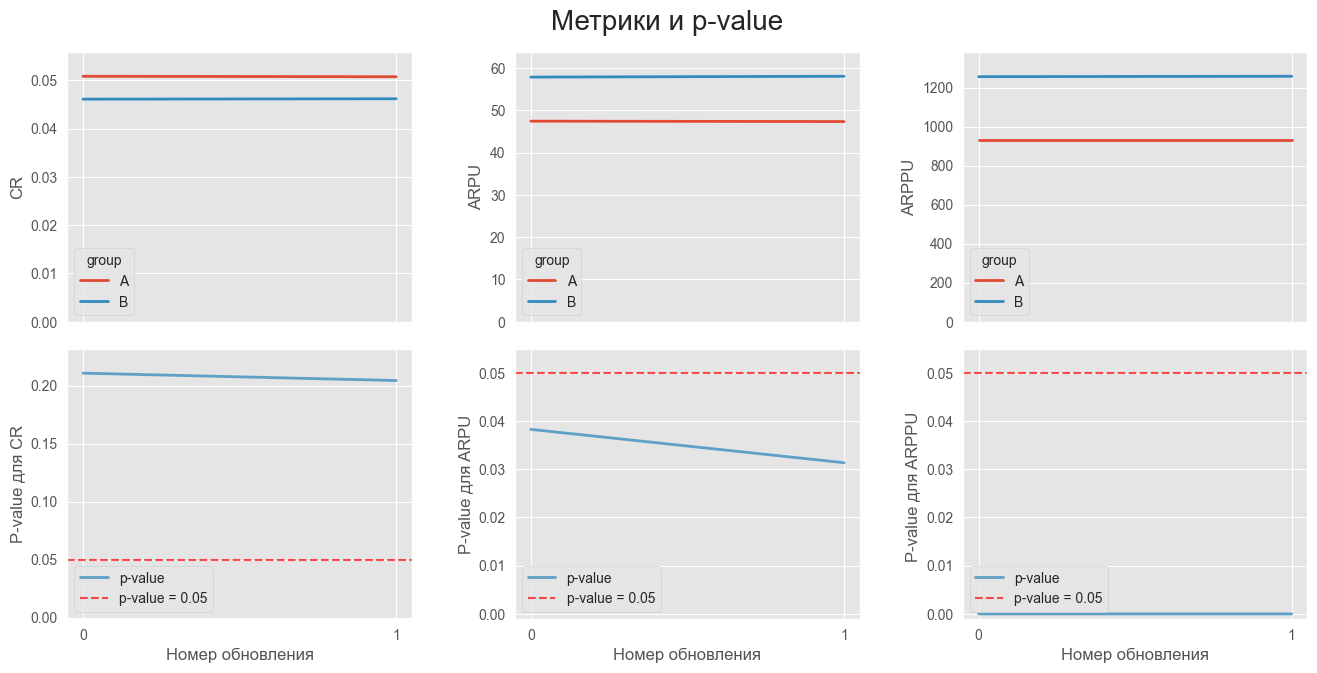

In [176]:
get_graphs(metrics)

Таким образом, используя функции `get_update` и `get_graphs` мы можем в несколько кликов получить метрики и графики с учетом новых данных.